# Actividad Clase 1 TSA

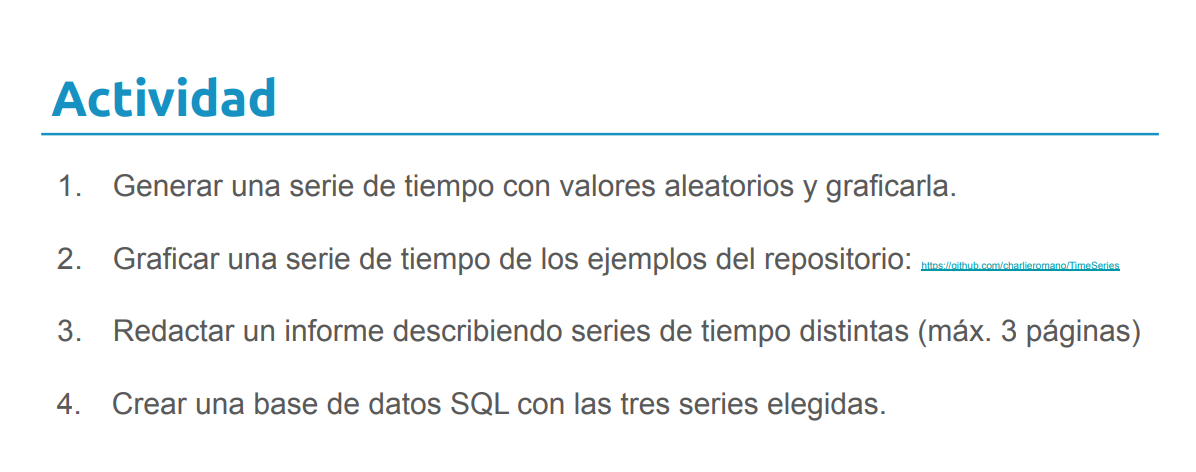

## 1. Serie de tiempo con valores aleatorios:
#### Distribuciones normales y T-Student

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mu = 0
sigma = 1
N = 100000
degFreedom = 5
bins = 50

In [3]:
# Random values data series
X = np.random.normal(mu, sigma, N)

Y = np.random.standard_t(degFreedom, N)

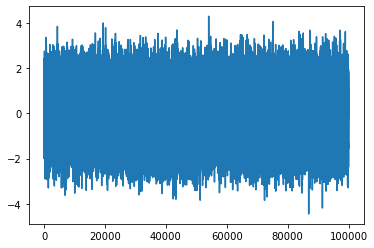

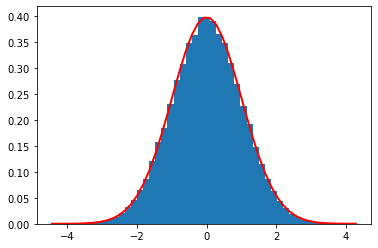

In [4]:
# Plot
plt.plot(X)
plt.show()

count, bins, ignored =plt.hist(X, bins, density=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth = 2, color='r')
plt.show()

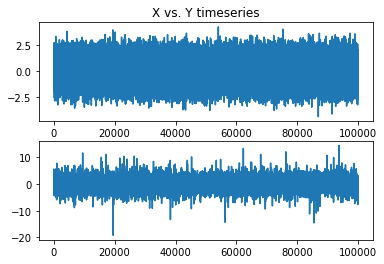

In [5]:
# Data series
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title('X vs. Y timeseries')
ax1.plot(X)
ax2.plot(Y)
plt.show()

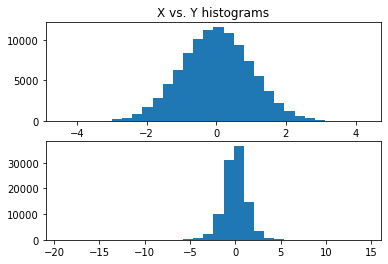

In [6]:
# Histograms
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title('X vs. Y histograms')
ax1.hist(X, bins=30)
ax2.hist(Y, bins=30)
plt.show()

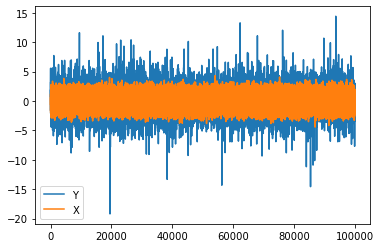

In [7]:
# using Dataframe structure
df=pd.DataFrame({'Y':Y, 'X':X})
df.plot()
plt.show()

In [8]:
## Stats
df.X.describe
df.Y.describe()
dt = pd.DataFrame(df.X.describe())
dt = pd.concat([df.X.describe(), df.Y.describe()],axis=1)

In [9]:
dt

,X,Y
count,100000.000000,100000.000000
mean,0.002225,-0.002384
std,1.002977,1.296150
min,-4.445718,-19.195813
25%,-0.676123,-0.733849
50%,0.003647,-0.008511
75%,0.680692,0.727464
max,4.290214,14.391711


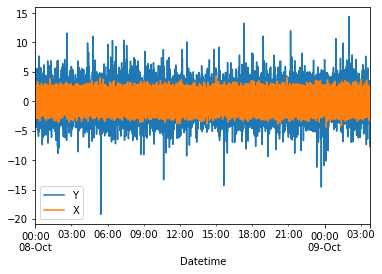

In [10]:
# adding datetime index
col = 0
time = pd.date_range('2021-10-08', periods=N, freq='s')
df.insert(col,"Datetime", time, True)
df.set_index('Datetime')
df.set_index('Datetime').plot()
plt.show()

In [11]:
# dataframe to csv
#df.to_csv('../Datasets/randomValues.csv')

## Series de tiempo

In [18]:
PATH = r'C:\Users\agust\Documents\GitHub\Carrera-de-Especializacion-en-IA\B5-Time_Series_Analysis\Datasets'

### Dataset 1: YPFD

In [20]:
dataset_1_name = r'\YPFD.2000.2021.csv'
YPFD = pd.read_csv(PATH+dataset_1_name)

In [21]:
YPFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4840 non-null   int64  
 1   fechaHora     4840 non-null   object 
 2   ultimoPrecio  4840 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 113.6+ KB


In [27]:
YPFD.head()

,fechaHora,ultimoPrecio
0,2021-06-29 17:00:01.710,783.15
1,2021-06-28 17:00:03.613,807.00
2,2021-06-25 17:00:02.397,831.65
3,2021-06-24 17:00:03.497,871.40
4,2021-06-23 17:00:03.290,857.65


In [25]:
YPFD.drop(columns=['Unnamed: 0'], inplace = True)

In [29]:
YPFD.describe()

,ultimoPrecio
count,4840.000000
mean,115.680014
std,239.699517
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,950.050000


In [31]:
YPFD['fechaHora'] = pd.to_datetime(YPFD['fechaHora'], format="%Y-%m-%d %H:%M:%S")

In [32]:
YPFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fechaHora     4840 non-null   datetime64[ns]
 1   ultimoPrecio  4840 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.8 KB


<AxesSubplot:xlabel='fechaHora'>

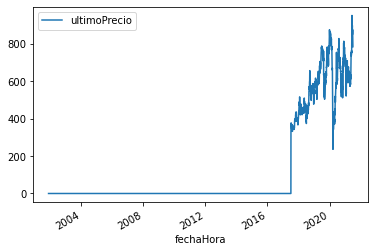

In [36]:
YPFD.plot(x='fechaHora',y='ultimoPrecio')

<AxesSubplot:ylabel='Frequency'>

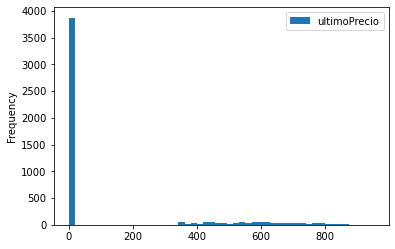

In [78]:
YPFD.plot(x='fechaHora',y='ultimoPrecio', kind='hist', bins = 50)

<AxesSubplot:>

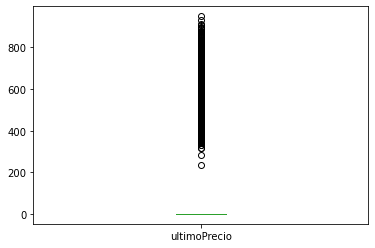

In [42]:
YPFD.plot(x='fechaHora',y='ultimoPrecio', kind='box')

<AxesSubplot:xlabel='fechaHora'>

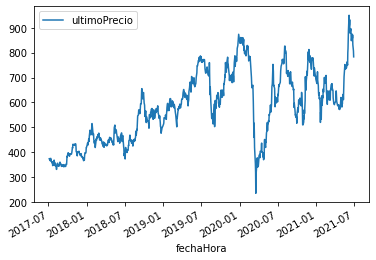

In [57]:
YPFD[YPFD.ultimoPrecio!=0].plot(x='fechaHora',y='ultimoPrecio')

<AxesSubplot:ylabel='Frequency'>

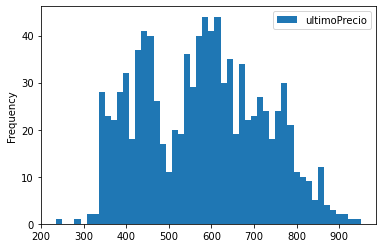

In [77]:
YPFD[YPFD.ultimoPrecio!=0].plot(x='fechaHora',y='ultimoPrecio', kind='hist', bins = 50)

<AxesSubplot:>

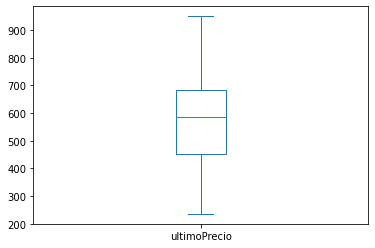

In [56]:
YPFD[YPFD.ultimoPrecio!=0].plot(x='fechaHora',y='ultimoPrecio', kind='box')

### Dataset 2: S1MME_week45

In [64]:
dataset_2_name = r'\S1MME_week45.csv'
S1MME_w45 = pd.read_csv(PATH+dataset_2_name)

In [65]:
S1MME_w45.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   MyDay                                      1008 non-null   object
 1   NENAME                                     1008 non-null   object
 2   S1_mode_combined_attach_request_times_SEQ  1008 non-null   int64 
 3   S1_mode_combined_attach_success_times_SEQ  1008 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.6+ KB


In [66]:
S1MME_w45.head()

,MyDay,NENAME,S1_mode_combined_attach_request_times_SEQ,S1_mode_combined_attach_success_times_SEQ
0,2020/11/02 0:00,MME1BEL,367245,225822
1,2020/11/02 1:00,MME1BEL,295774,176136
2,2020/11/02 2:00,MME1BEL,305409,195410
3,2020/11/02 3:00,MME1BEL,277590,146942
4,2020/11/02 4:00,MME1BEL,303168,176509


In [67]:
S1MME_w45['MyDay'] = pd.to_datetime(S1MME_w45['MyDay'], format="%Y-%m-%d %H:%M:%S")

In [68]:
S1MME_w45.head()

,MyDay,NENAME,S1_mode_combined_attach_request_times_SEQ,S1_mode_combined_attach_success_times_SEQ
0,2020-11-02 00:00:00,MME1BEL,367245,225822
1,2020-11-02 01:00:00,MME1BEL,295774,176136
2,2020-11-02 02:00:00,MME1BEL,305409,195410
3,2020-11-02 03:00:00,MME1BEL,277590,146942
4,2020-11-02 04:00:00,MME1BEL,303168,176509


In [91]:
S1MME_w45['NENAME'].unique()

array(['MME1BEL', 'MME1CLI', 'MME1MUN', 'MME2BEL', 'MME2CLI', 'MME2MUN'],
      dtype=object)

In [69]:
S1MME_w45.describe()

,S1_mode_combined_attach_request_times_SEQ,S1_mode_combined_attach_success_times_SEQ
count,1008.000000,1008.000000
mean,382133.552579,231401.267857
std,90652.954849,67367.189127
min,51135.000000,31966.000000
25%,347147.750000,193757.250000
50%,397835.000000,238415.000000
75%,424354.500000,263678.000000
max,623494.000000,469172.000000


<AxesSubplot:xlabel='MyDay'>

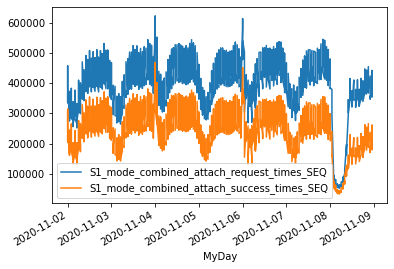

In [71]:
S1MME_w45.plot(x='MyDay',y=['S1_mode_combined_attach_request_times_SEQ', 'S1_mode_combined_attach_success_times_SEQ'])

<AxesSubplot:ylabel='Frequency'>

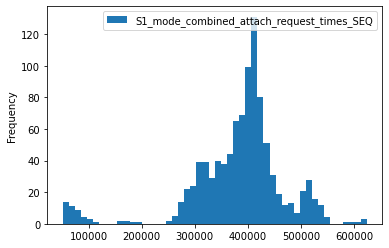

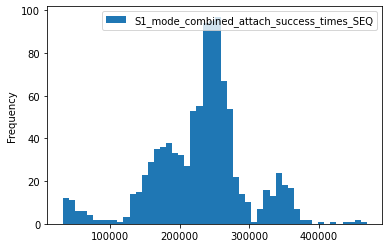

In [76]:
S1MME_w45.plot(x='MyDay',y='S1_mode_combined_attach_request_times_SEQ', kind='hist', bins = 50)
S1MME_w45.plot(x='MyDay',y='S1_mode_combined_attach_success_times_SEQ', kind='hist', bins = 50)

<AxesSubplot:>

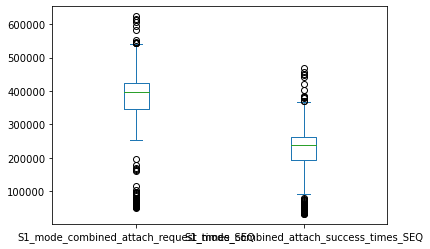

In [73]:
S1MME_w45.plot(x='MyDay',y=['S1_mode_combined_attach_request_times_SEQ', 'S1_mode_combined_attach_success_times_SEQ'], kind='box')

### Dataset 3: TECO2.2010.2021

In [79]:
dataset_3_name = r'\TECO2.2010.2021.csv'
TECO2_10_21 = pd.read_csv(PATH+dataset_3_name)

In [81]:
TECO2_10_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2771 non-null   int64  
 1   fechaHora     2771 non-null   object 
 2   ultimoPrecio  2771 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 65.1+ KB


In [82]:
TECO2_10_21.describe()

,Unnamed: 0,ultimoPrecio
count,2771.000000,2771.000000
mean,1385.000000,71.413464
std,800.063123,62.781924
min,0.000000,8.551991
25%,692.500000,16.555273
50%,1385.000000,44.966572
75%,2077.500000,122.900000
max,2770.000000,269.950000


In [83]:
TECO2_10_21.drop(columns=['Unnamed: 0'], inplace = True)

In [84]:
TECO2_10_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fechaHora     2771 non-null   object 
 1   ultimoPrecio  2771 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.4+ KB


In [85]:
TECO2_10_21['fechaHora'] = pd.to_datetime(TECO2_10_21['fechaHora'], format="%Y-%m-%d %H:%M:%S")

In [86]:
TECO2_10_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fechaHora     2771 non-null   datetime64[ns]
 1   ultimoPrecio  2771 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.4 KB


In [87]:
TECO2_10_21.describe()

,ultimoPrecio
count,2771.000000
mean,71.413464
std,62.781924
min,8.551991
25%,16.555273
50%,44.966572
75%,122.900000
max,269.950000


<AxesSubplot:xlabel='fechaHora'>

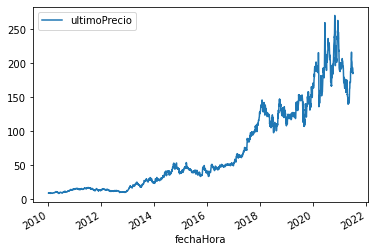

In [88]:
TECO2_10_21.plot(x='fechaHora',y='ultimoPrecio')

<AxesSubplot:ylabel='Frequency'>

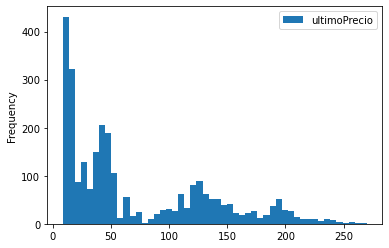

In [89]:
TECO2_10_21.plot(x='fechaHora',y='ultimoPrecio', kind = 'hist', bins = 50)

<AxesSubplot:>

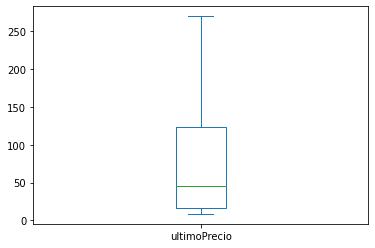

In [90]:
TECO2_10_21.plot(x='fechaHora',y='ultimoPrecio', kind = 'box')